In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D
from htmresearch.support.gridcells.context_integration.context_layer import ContextLayer
from htmresearch.support.gridcells.context_integration.utils import (create_module_shape, 
                                                                     create_action_tensor, 
                                                                     get_actions, 
                                                                     get_closed_3d_path,
                                                                     load_digit_features)

from scipy.stats import entropy

%matplotlib inline
%load_ext autoreload
%autoreload 2


m = 1    # Number of modules
n = 30   # Approximate number of cells per module dimension
d = 1    # Cells per minicolumn
w = 1    # Code weight of the sensory SDR


zero   = np.zeros(2*m)
dx, dy = get_actions(m,2)

print dy

action_tensor = np.array([[ 
    [3.,0.],
    [0.,1.]
]]) 

X, V = get_closed_3d_path(num_samples=20, radius=5)

CL  = ContextLayer(layer_height=d, module_shapes=[[n,n]], action_map=action_tensor, max_activity=200) 

F = load_digit_features(w=w, shape=CL.layer.shape)

print CL

CL.state[CL.perm[0]] = 1.

# img = 0.2*CL.get_module(0)
# a = 0*dx + 2*dy
# print a
# CL.explore(dy)
# img += CL.get_module(0)

# plt.figure(figsize=(5,5))
# plt.title("Module view")
# plt.xticks([])
# plt.yticks([])
# plt.imshow(img, cmap="binary")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[ 0.  1.]

**Context Layer:**
------------------
Number of cells:	 900
Layer Shape:		 (1, 900)
Hyper-Module Shapes:
[[30, 30]]
Module bounds: [  0 900]
Number of grid cells:	 900
Activity bound:		 200
------------------


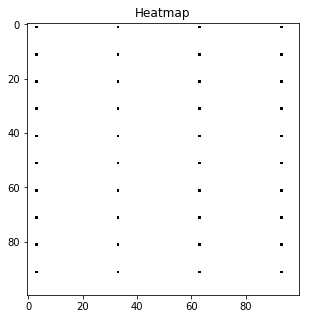

In [70]:
env = np.zeros((100,100))

indices = np.indices(env.shape)
positions = np.concatenate( [indices[0].reshape(1,-1), indices[1].reshape(1,-1)], axis=0 ).T


activity = np.zeros((env.shape[0], env.shape[1], n*n))
for x,y in positions:
    a = x*dx + y*dy
    M = CL.explore(a, mentally=True)
    activity[x,y,:] = M[:]
    
    
    
plt.figure(figsize=(5,5))
plt.title("Heatmap")
plt.imshow(activity[:,:,1], cmap="binary")



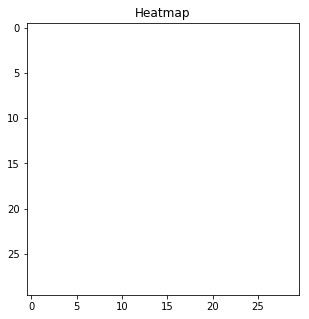